In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("/Users/majid/Downloads/Datasets/Wholesale customers data.csv")

In [4]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [5]:
df.size

3520

In [6]:
df.shape

(440, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [8]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [9]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [10]:
df = df.drop(columns = ['Channel','Region'],axis=1)

In [11]:
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [12]:
x = df

In [13]:
Q1 = x.quantile(0.25)
Q3 = x.quantile(0.75)
IQR = Q3 -Q1

outliers_condition = ((x < ( Q1 - 1.5*IQR)) | (x > (Q3 + 1.5 * IQR))).any(axis= 1)
outliers = df[outliers_condition]

print(f"Number Of Outliers : {len(outliers)} ")
print(outliers)

Number Of Outliers : 108 
     Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
2     6353   8808     7684    2405              3516        7844
4    22615   5410     7198    3915              1777        5185
17    5876   6157     2933     839               370        4478
22   31276   1917     4469    9408              2381        4334
23   26373  36423    22019    5154              4337       16523
..     ...    ...      ...     ...               ...         ...
427  31012  16687     5429   15082               439        1163
431   8533   5506     5160   13486              1377        1498
435  29703  12051    16027   13135               182        2204
436  39228   1431      764    4510                93        2346
437  14531  15488    30243     437             14841        1867

[108 rows x 6 columns]


In [14]:
from sklearn.preprocessing import StandardScaler
sscaler = StandardScaler()
x = sscaler.fit_transform(x)

In [15]:
from sklearn.preprocessing import RobustScaler
rscaler = RobustScaler()
x = rscaler.fit_transform(x)

In [22]:
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score

ModuleNotFoundError: No module named 'sklearn_extra'

In [23]:
sil_scores = []
k_range = range(2, 11)                                                       # Try 2 to 10 clusters
for k in k_range:
    kmedoids = KMedoids(n_clusters=k, random_state=42, method='pam')
    labels = kmedoids.fit_predict(x)
    score = silhouette_score(x, labels)
    sil_scores.append(score)
    print(f"k = {k}, Silhouette Score = {score:.3f}")

NameError: name 'KMedoids' is not defined

ValueError: x and y must have same first dimension, but have shapes (9,) and (0,)

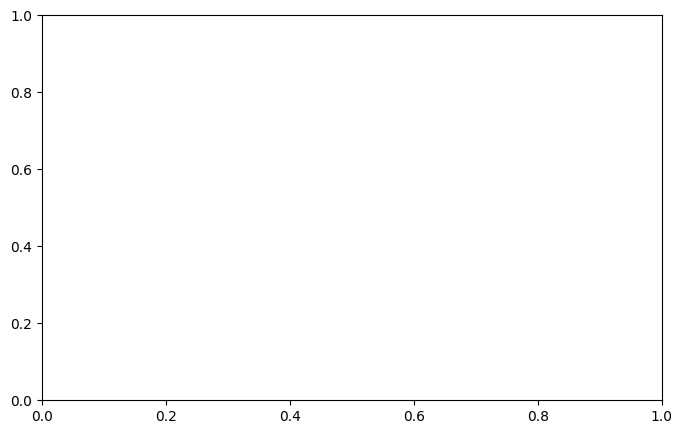

In [24]:
# Plot Silhouette Scores
plt.figure(figsize=(8,5))
plt.plot(k_range, sil_scores, marker='o')
plt.title("Silhouette Score for K-Medoids")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()

In [25]:
## max value score is at K=2
kmedoids = KMedoids(n_clusters=2, random_state=42)
clusters = kmedoids.fit_predict(x)

NameError: name 'KMedoids' is not defined

In [26]:
df['Cluster'] = clusters

NameError: name 'clusters' is not defined

In [27]:
cluster_summary = df.groupby('Cluster')[df.columns].mean()
print("\nCluster Summary:\n", cluster_summary)

KeyError: 'Cluster'

In [28]:
cluster_summary[df.columns].T.plot(kind='bar', figsize=(12,6))
plt.title("Average Spending per Cluster")
plt.xlabel("Product Category")
plt.ylabel("Average Spending")
plt.show()


NameError: name 'cluster_summary' is not defined

In [29]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
score = silhouette_score(x, clusters)
print("Silhouette Score:", score)


NameError: name 'clusters' is not defined

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x)

In [31]:
plt.figure(figsize=(8,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='viridis', s=50)
plt.title('Customer Segments (PCA Visualization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

NameError: name 'clusters' is not defined

<Figure size 800x500 with 0 Axes>